In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [3]:
PATH = 'clustersData_no_light/mean_spikes/'
LABEL_PATH = 'temp_state_minus_light/' 
spikes = []
labels = []

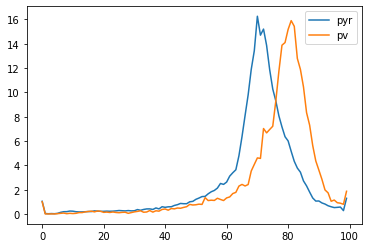

In [14]:
def get_main(channels):
    amps = channels.max(axis=1) - channels.min(axis=1)
    main_channel = np.argmax(amps)
    return channels[main_channel]

def get_label(i, lst):
    name = lst[i]
    return int(name.split('__')[-2])

files = os.listdir(PATH)
label_files = sorted(os.listdir(LABEL_PATH))
assert 2* len(files) == len(label_files)
for i, file in enumerate(sorted(files)):
    label = get_label(2 * i, label_files)
    if label < 0:
        continue
    spike = np.load(PATH + file)
    spikes.append(spike / (-spike.min()))
    labels.append(label)

hists_pyr, hists_pv = [], []
for spike, label in zip(spikes, labels):
    hist, _ = np.histogram(spike, bins=100)
    if label == 0:
        hists_pv.append(hist)
    else:
        hists_pyr.append(hist)

hists_pyr = np.array(hists_pyr).mean(axis=0)
hists_pv = np.array(hists_pv).mean(axis=0)
plt.plot(hists_pyr, label='pyr')
plt.plot(hists_pv, label='pv')
plt.legend()
plt.show()
    